# BLOC 3 - CONVERSION RATE CHALLENGE

##### Coralie GUILLOTTE - DSMFT-paris-20

## Import libraries

In [95]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe_connected" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

## Read file with labels

In [2]:
df_conv_rate = pd.read_csv('conversion_data_train.csv')

## Exploration

In [3]:
df_conv_rate.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [4]:
df_conv_rate.shape

(284580, 6)

In [5]:
# check the data types
df_conv_rate.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [6]:
df_conv_rate.describe(include = 'all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [7]:
# count the proportion of missing values in the dataset
((df_conv_rate.isnull().sum())/(df_conv_rate.shape[0]))*100

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [8]:
px.box(df_conv_rate, y = 'age', title = 'Ages of the users')

In [9]:
mask = df_conv_rate['age'] < 80
df_conv_rate = df_conv_rate[mask]
px.box(df_conv_rate, y = 'age', title = 'Age after removing outliers')

In [10]:
px.box(df_conv_rate, y = 'age', color = 'converted', title = 'Age and conversion')

In [11]:
# plot a correlation matrix of the numeric variables
px.imshow(df_conv_rate.corr(), title = 'Correlation matrix heatmap')

Text(0.5, 1.0, 'Country and conversion rate')

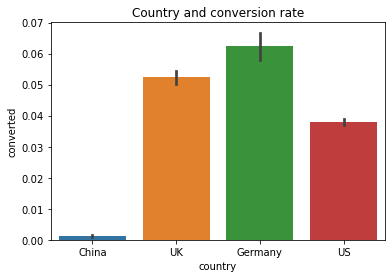

In [12]:
sns.barplot(x="country", y="converted", data=df_conv_rate)
plt.title("Country and conversion rate")

Text(0.5, 1.0, 'Source and conversion rate')

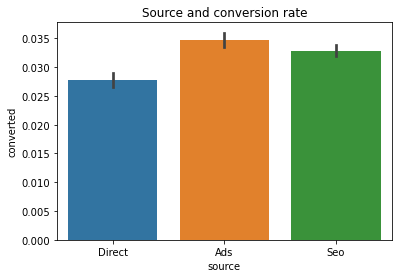

In [13]:
sns.barplot(x="source", y="converted", data=df_conv_rate)
plt.title("Source and conversion rate")

Text(0.5, 1.0, 'User and conversion rate')

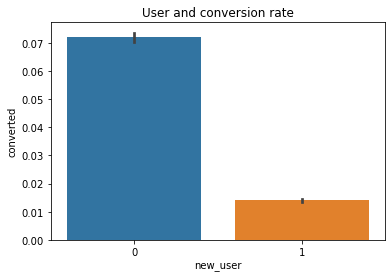

In [14]:
sns.barplot(x="new_user", y="converted", data=df_conv_rate)
plt.title("User and conversion rate")

## Model

#### Only one feature = 'total_pages_visited' ==> Jeadha's template

In [15]:
df_conv_rate['new_user'] = df_conv_rate['new_user'].astype(object)

In [16]:
df_conv_rate.dtypes

country                object
age                     int64
new_user               object
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [17]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [58]:
X_OF = df_conv_rate.loc[:, features_list]
Y_OF = df_conv_rate.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [61]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_OF_train, X_OF_test, Y_OF_train, Y_OF_test = train_test_split(X_OF, Y_OF, test_size=0.1, random_state=0, stratify = Y_OF)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [62]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_OF_train = X_OF_train.values
X_OF_test = X_OF_test.values
Y_OF_train = Y_OF_train.values
Y_OF_test = Y_OF_test.values
print("...Done")

print(X_OF_train[0:5,:])
print(X_OF_test[0:2,:])
print()
print(Y_OF_train[0:5])
print(Y_OF_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[4]
 [5]
 [3]
 [1]
 [6]]
[[14]
 [ 5]]

[0 0 0 0 0]
[0 0]


In [72]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder_OF = StandardScaler()
X_OF_train = featureencoder_OF.fit_transform(X_OF_train)
print("...Done")
print(X_OF_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26099836]
 [ 0.03829244]
 [-0.56028917]
 [-1.15887077]
 [ 0.33758325]]


In [73]:
# Train model
print("Train model...")
classifier_OF_LR = LogisticRegression() # 
classifier_OF_LR.fit(X_OF_train, Y_OF_train)
print("...Done.")

Train model...
...Done.


In [74]:
# Predictions on training set
print("Predictions on training set...")
Y_OF_train_pred = classifier_OF_LR.predict(X_OF_train)
print("...Done.")
print(Y_OF_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [77]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_OF_test = featureencoder_OF.transform(X_OF_test)
print("...Done")
print(X_OF_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 2.73190968]
 [ 0.03829244]
 [-0.26099836]
 [ 0.93616485]
 [ 0.93616485]]


In [78]:
# Predictions on test set
print("Predictions on test set...")
Y_test_OF_pred = classifier_OF_LR.predict(X_OF_test)
print("...Done.")
print(Y_test_OF_pred)
print()

Predictions on test set...
...Done.
[1 0 0 ... 0 0 0]



In [79]:
print("accuracy on training set : ", accuracy_score(Y_OF_train, Y_OF_train_pred))
print("accuracy on test set : ", accuracy_score(Y_OF_test, Y_test_OF_pred))
print()

accuracy on training set :  0.9829728252381696
accuracy on test set :  0.9828519221308595



In [80]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_OF_train, Y_OF_train_pred))
print("f1-score on test set : ", f1_score(Y_OF_test, Y_test_OF_pred))

f1-score on train set :  0.6950136373172948
f1-score on test set :  0.6961394769613949


In [81]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_OF_train, Y_OF_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_OF_test, Y_test_OF_pred))
print()

Confusion matrix on train set : 
[[246790   1070]
 [  3291   4969]]

Confusion matrix on test set : 
[[27411   129]
 [  359   559]]



Confusion matrix on train set : 


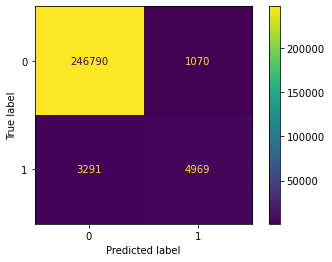


Confusion matrix on test set : 


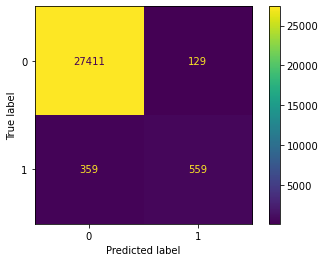

In [82]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
cm_train = confusion_matrix(Y_OF_train, Y_OF_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=classifier_OF_LR.classes_)
disp_train.plot()
plt.show()
print()
print("Confusion matrix on test set : ")
cm_test = confusion_matrix(Y_OF_test, Y_test_OF_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier_OF_LR.classes_)
disp_test.plot()
plt.show()

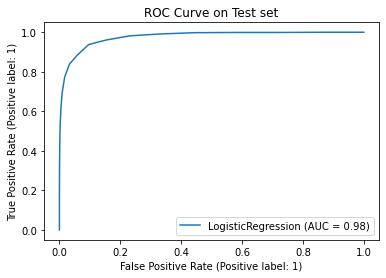

In [83]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set")
RocCurveDisplay.from_estimator(classifier_OF_LR, X_OF_test, Y_OF_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

#### All features

In [84]:
df_conv_rate.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [86]:
df_conv_rate['country'] = df_conv_rate['country'].astype(pd.StringDtype())
df_conv_rate['new_user'] = df_conv_rate['new_user'].astype(pd.StringDtype())
df_conv_rate['source'] = df_conv_rate['source'].astype(pd.StringDtype())

In [85]:
df_conv_rate.dtypes

country                string
age                     int64
new_user               string
source                 string
total_pages_visited     int64
converted               int64
dtype: object

In [89]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list_AF = ['total_pages_visited', 'country', 'age', 'new_user', 'source']
target_variable_AF = 'converted'

X_AF = df_conv_rate.loc[:,features_list_AF]
Y_AF = df_conv_rate.loc[:,target_variable_AF]

print("...Done.")
print()

print('Y : ')
print(Y_AF.head())
print()
print('X :')
print(X_AF.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   total_pages_visited  country  age new_user  source
0                    2    China   22        1  Direct
1                    3       UK   21        1     Ads
2                   14  Germany   20        0     Seo
3                    3       US   23        1     Seo
4                    3       US   28        1  Direct


In [92]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features_AF = []
numeric_indices_AF = []
categorical_features_AF = []
categorical_indices_AF = []
for i,t in X_AF.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features_AF.append(i)
        numeric_indices_AF.append(idx)
    else :
        categorical_features_AF.append(i)
        categorical_indices_AF.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features_AF,' at positions ', numeric_indices_AF)
print('Found categorical features ', categorical_features_AF,' at positions ', categorical_indices_AF)

Found numeric features  ['total_pages_visited', 'age']  at positions  [0, 2]
Found categorical features  ['country', 'new_user', 'source']  at positions  [1, 3, 4]


In [93]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_AF_train, X_AF_test, Y_AF_train, Y_AF_test = train_test_split(X_AF, Y_AF, test_size=0.2, random_state=0, stratify = Y_AF)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [96]:
# numeric transformation 
numeric_transformer_AF = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),
        ("num_scaler", StandardScaler())
    ]
)

# OHE / dummyfication
categorical_transformer_AF = OneHotEncoder(drop='first')

preprocessor_AF = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_AF, categorical_indices_AF),    
        ('num', numeric_transformer_AF, numeric_indices_AF)
        ]
    )

X_AF_train = preprocessor_AF.fit_transform(X_AF_train)
print("...Done")
print(X_AF_train[0:5,:])

...Done
[[ 0.          0.          1.          0.          1.          0.
   0.0376251  -0.91614386]
 [ 0.          0.          1.          1.          0.          0.
  -0.2616379  -0.55333446]
 [ 1.          0.          0.          1.          0.          0.
  -0.86016391  1.01883962]
 [ 0.          0.          1.          1.          0.          1.
   0.9354141   1.01883962]
 [ 0.          0.          1.          1.          0.          1.
  -0.86016391  1.62352196]]


In [97]:
# Train model
print("Train model...")
classifier_AF_LR = LogisticRegression()
classifier_AF_LR.fit(X_AF_train, Y_AF_train)
print("...Done.")

Train model...
...Done.


In [99]:
# Predictions on training set
print("Predictions on training set...")
Y_AF_train_pred = classifier_AF_LR.predict(X_AF_train)
print("...Done.")
print(Y_AF_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [100]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print(X_AF_test.head())
X_AF_test = preprocessor_AF.transform(X_AF_test)
print("...Done")
print(X_AF_test[0:5,:])


Encoding categorical features and standardizing numerical features...
        total_pages_visited country  age new_user  source
138303                    1      UK   34        1     Ads
133130                    5      UK   32        0     Ads
245758                    1      US   44        1     Ads
185267                    1      US   35        1  Direct
177637                    3      US   29        1  Direct
...Done
[[ 0.          1.          0.          1.          0.          0.
  -1.15942691  0.41415728]
 [ 0.          1.          0.          0.          0.          0.
   0.0376251   0.17228435]
 [ 0.          0.          1.          1.          0.          0.
  -1.15942691  1.62352196]
 [ 0.          0.          1.          1.          1.          0.
  -1.15942691  0.53509375]
 [ 0.          0.          1.          1.          1.          0.
  -0.56090091 -0.19052506]]


In [101]:
# Predictions on test set
print("Predictions on test set...")
Y_AF_test_pred = classifier_AF_LR.predict(X_AF_test)
print("...Done.")
print(Y_AF_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [103]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_AF_train, Y_AF_train_pred))
print("accuracy on test set : ", accuracy_score(Y_AF_test, Y_AF_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_AF_train, Y_AF_train_pred))
print("f1-score on test set : ", f1_score(Y_AF_test, Y_AF_test_pred))
print()

accuracy on training set :  0.9862427633948573
accuracy on test set :  0.9862077447466442

f1-score on training set :  0.7636583157259282
f1-score on test set :  0.7646176911544227



Confusion matrix on train set : 


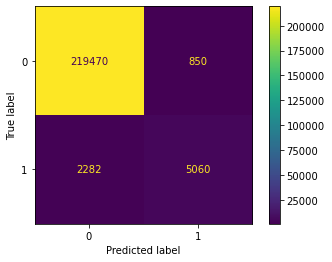


Confusion matrix on test set : 


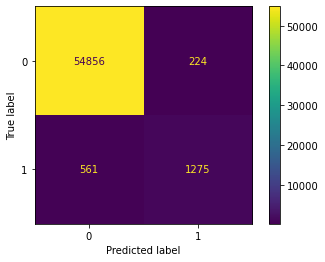

In [104]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
cm_train1 = confusion_matrix(Y_AF_train, Y_AF_train_pred)
disp_train1 = ConfusionMatrixDisplay(confusion_matrix=cm_train1, display_labels=classifier_AF_LR.classes_)
disp_train1.plot()
plt.show()
print()
print("Confusion matrix on test set : ")
cm_test1 = confusion_matrix(Y_AF_test, Y_AF_test_pred)
disp_test1 = ConfusionMatrixDisplay(confusion_matrix=cm_test1, display_labels=classifier_AF_LR.classes_)
disp_test1.plot()
plt.show()

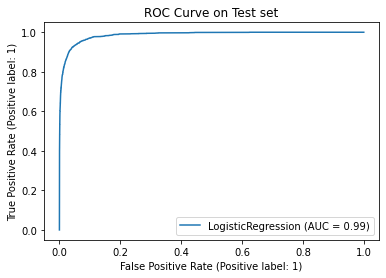

In [105]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set")
RocCurveDisplay.from_estimator(classifier_AF_LR, X_AF_test, Y_AF_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

In [149]:
tx = preprocessor_AF.get_params()['transformers']
feature_names = []
for name,transformer,features in tx:
    try:
        Var = preprocessor_AF.named_transformers_[name].get_feature_names_out ().tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var


In [150]:
feature_names

['country_Germany',
 'country_UK',
 'country_US',
 'new_user_1',
 'source_Direct',
 'source_Seo',
 0,
 2]

In [151]:
features_imp = classifier_AF_LR.coef_
col_names = ['country_Germany','country_UK','country_US','new_user_1','source_Direct','source_Seo','total_pages_visited', 'age']
df_features_imp = pd.DataFrame(columns=col_names, data=features_imp)
df_features_imp

,country_Germany,country_UK,country_US,new_user_1,source_Direct,source_Seo,total_pages_visited,age
0,3.640448,3.480945,3.131383,-1.724003,-0.214273,-0.026724,2.533636,-0.6151


#### Others models

In [110]:
svm_classif = SVC()

In [111]:
svm_classif.fit(X_AF_train, Y_AF_train)

SVC()

In [112]:
# Predictions on training set
print("Predictions on training set...")
Y_AF_train_pred_svm = svm_classif.predict(X_AF_train)
print("...Done.")
print(Y_AF_train_pred_svm)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [114]:
# Predictions on test set
print("Predictions on test set...")
Y_AF_test_pred_svm = svm_classif.predict(X_AF_test)
print("...Done.")
print(Y_AF_test_pred_svm)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [115]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_AF_train, Y_AF_train_pred_svm))
print("accuracy on test set : ", accuracy_score(Y_AF_test, Y_AF_test_pred_svm))
print()

print("f1-score on training set : ", f1_score(Y_AF_train, Y_AF_train_pred_svm))
print("f1-score on test set : ", f1_score(Y_AF_test, Y_AF_test_pred_svm))
print()

accuracy on training set :  0.9861417364338362
accuracy on test set :  0.9855752336777005

f1-score on training set :  0.7539961013645226
f1-score on test set :  0.745584133870468



#### best model

In [116]:
# Concatenate our train and test set to train your best classifier on all data with labels
X_BC = np.append(X_AF_train,X_AF_test,axis=0)
Y_BC = np.append(Y_AF_train,Y_AF_test)

classifier_AF_LR.fit(X_BC,Y_BC)

LogisticRegression()

In [117]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

Prediction set (without labels) : (31620, 5)


In [118]:
data_without_labels.head()

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [122]:
data_without_labels.dtypes

country                string
age                     int64
new_user               string
source                 string
total_pages_visited     int64
dtype: object

In [120]:
data_without_labels['country'] = data_without_labels['country'].astype(pd.StringDtype())
data_without_labels['new_user'] = data_without_labels['new_user'].astype(pd.StringDtype())
data_without_labels['source'] = data_without_labels['source'].astype(pd.StringDtype())

In [121]:
# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list_BC = ['total_pages_visited', 'country', 'age', 'new_user', 'source']
X_without_labels = data_without_labels.loc[:, features_list_BC]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Convert pandas DataFrames to numpy arrays...
...Done
[[16 'UK' 28 '0' 'Seo']
 [5 'UK' 22 '1' 'Direct']
 [1 'China' 32 '1' 'Seo']
 [6 'US' 32 '1' 'Ads']
 [3 'China' 25 '0' 'Seo']]


In [123]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor_AF.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          0.          1.
   3.32951812 -0.31146152]
 [ 0.          1.          0.          1.          1.          0.
   0.0376251  -1.03708033]
 [ 0.          0.          0.          1.          0.          1.
  -1.15942691  0.17228435]
 [ 0.          0.          1.          1.          0.          0.
   0.3368881   0.17228435]
 [ 0.          0.          0.          0.          0.          1.
  -0.56090091 -0.67427093]]


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but SimpleImputer was fitted with feature names



In [125]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier_AF_LR.predict(X_without_labels)
}

Y_BC_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_BC_predictions.to_csv('conversion_data_test_predictions_LR_AF.csv', index=False)

### <ins>To implement in the model:</ins> <br>

- <font size = 4>Test others models and play with the hyper parameters, i try to use gridsearch for severals models with my PC but it didn't work (too long and no results)</font>

### <ins>To improve conversion rate:</ins> <br>

- <font size = 4>Study the expectations and needs of users and try to meet them</font>
- <font size = 4>Increase presence in Europe since conversion rate in UK and Germany are higher..or work on the US since more users but less conversion</font>